#### **Course - Language, Reading and the Brain**

**SISSA Cognitive Neuroscience PhD 2023/24**

**Prof. Davide Crepaldi**

**Student: Emma Angela Montecchiari [UniTN-SISSA MCs]**

****

**Assignment 2: DRC simulations**

**Submission Date: May 15th, 2024**

****


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## **DRC model**


The focus of the assignment is to analyze the performance of the **Dual Route Cascading** (DRC) model, a computational model of visual word recognition and reading aloud developed by *Coltheart, M., Rastle, K., Perry, C., Langdon, R., & Ziegler, J. (2001). DRC: a dual route cascaded model of visual word recognition and reading aloud. Psychological review, 108(1), 204–256.*. The model consists of two primary routes: the lexical route, which integrates semantic and non-semantic features, and the non-lexical Grapheme-to-Phoneme Conversion (GPC) route. These routes interact within their respective layers through inhibition and excitation dynamics.

The term *cascading* in the model's name denotes a system operating without predefined thresholds, enabling even minimal activation in an initial module to propagate through subsequent stages. In the lexical route, word processing occurs holistically, with words mapped to a lexicon of known entities and their associated pronunciations. Conversely, the non-lexical GPC route decodes words sequentially, applying phonetic rules to convert graphemes into phonemes on a letter-by-letter basis.

Model performance is assessed based on the speed measured by the number of cycles necessary for the model to resolve conflicts between the two routes and produce the accurate word reading form. Increased cycles indicate slower and more challenging processing. This aligns with the concept in human reading behavior, where the perception of "fast" or "slow" reading correlates with the time taken to resolve conflicts.

This model, as demonstrated by *(Coltheart et al., 2001)*, adheres to human behavioral standards, making it a reliable tool for investigating visual word recognition and reading.





The DRC is provided by *(Coltheart et al., 2001)* with a standard set of  parameters which the user can change. The standard set is:
```
* General Parameters *
  ActivationRate 0.2 - FrequencyScale 0.05 - MinReadingPhonology 0.4
* Feature Level Parameters *
  FeatureLetterExcitation 0.005 * FeatureLetterInhibition 0.15 - FeatureDuration 0
* Letter Level Parameters *
  LetterOrthlexExcitation 0.07 - LetterOrthlexInhibition 0.48 - LetterLateralInhibition 0
* Orthographic Lexicon (Orthlex) Parameters *
  OrthlexPhonlexExcitation 0.25 - OrthlexPhonlexInhibition 0 - OrthlexLetterExcitation 0.3 - OrthlexLetterInhibition 0 - OrthlexLateralInhibition 0.06
* Phonological Lexicon (Phonlex) Parameters *
  PhonlexPhonemeExcitation 0.09 - PhonlexPhonemeInhibition 0 - PhonlexOrthlexExcitation 0.25 - PhonlexOrthlexInhibition 0 - PhonlexLateralInhibition 0.07
* Phoneme Level Parameters *
  PhonemePhonlexExcitation 0.04 - PhonemePhonlexInhibition 0.16 - PhonemeLateralInhibition 0.147 - PhonemeUnsupportedDecay 0.05
* GPC Route Parameters *
  GPCPhonemeExcitation 0.051 - GPCCriticalPhonology 0.05 - GPCInterletterInterval 0 - GPCOnset 26

```

The model can be applied on a bunch of words datasets. The ones that are relevant for the assignment are:

**regular.txt** - 20 regular words:

``` buds, canes, coil, curl, grade, lump, lode, pops, rump, sock, sage, suck, sobs, wade, weed, wick, weld, wilt, woke, wink ```

**irregular.txt** - 20 irregular words:

``` bury, caste, comb, grow, glove, lure, lute, pour, ruse, sew, sans, sues, sown, wand, warn, warp, wasp, wily, wool, worm```

**nonwordNonPseudohomophone.txt** - 30 non-pseudohomophone nonwords

``` prane, filc, jole, raim, chele, woast, troov, hayne, chaid, fode, yume, paik, gled, noope, meap, rawk, plak, voam, slud, pite, clo, smeet, kye,dawl, laip, darst, bej, lerd, sair, snoo```

**nonwordPseudohomophone.txt** - 30 pseudohomophone nonwords

``` brane, milc, gole, gaim, whele, poast, moov, rayne, traid, tode, rume, maik, hed, groope, keap, stawk, blak, hoam, blud, fite, blo, treet, hye, cawl, shaip, larst, lej, berd, cair, croo ```

In [ ]:
#############################################################################################################################################################

## **[1] Regularity effect**

**Instructions**

The regularity effect consists in the fact that words with a regular spelling (e.g.,
wick) gets named more quickly than words with an irregular spelling (e.g., wand; *McCann and Besner, 1987; Rastle and Coltheart, 1999*). Explain how the DRC offers an account for this effect, and verifies it by simulating the reading of a bunch of regular words (regular.txt) and a comparable set of irregular words (irregular.txt). Illustrate which activations in the DRC dynamics confirms your verbal account. Now try to make the regularity effect bigger, or smaller – how would you do that? Illustrate with simulations.

### **Regularity effect and DRC**

- Words with a regular spelling gets named more quickly than words with an irregular spelling *(McCann and Besner, 1987; Rastle and Coltheart, 1999)*.

Regular words are typically read faster due to their consistent adherence to grapheme-phoneme rules, allowing for immediate application. When both lexical and non-lexical routes are activated, they generally align, easily resolving any conflicts. In contrast, irregular words encounter delays in processing within the DRC model, similar to human performance, primarily due to competition at the phoneme level. This competition intensifies when there's an irregular grapheme-phoneme correspondence.

This disparity is exemplified by the word *comb*, where the lexical route activates the phoneme /ou/ while the non-lexical route activates /o/. The inhibition between phoneme units slows down the rise of activation for the correct phoneme /ou/, due to inhibition from the regularization phoneme /o/. Such inhibition is absent in regular words, where both routes tend to align.

This effect is more pronounced for high-frequency regular words, as quicker phoneme activation from lexical sources reduces the inhibitory impact from non-lexical sources. Equally, high-frequency irregular words exhibit a smaller regularity effect *(Seidenberg et al., 1984; Taraban and McClelland, 1987; Paap, Chen, and Noel, 1987; Paap and Noel, 1991)*.

In the case of irregular words, the DRC model predominantly relies on stored pronunciations within the lexical route rather than the set of grapheme-phoneme correspondences. The discrepancy between the two leads to longer processing times while tryning to reconcile the conflicting information between the two routes.

#### **Simulation Irregular vs. Regular - Standard parameters**
Commands (terminal input)
```
$ ./drc -b regular.txt
$ ./drc -b irregular.txt
```

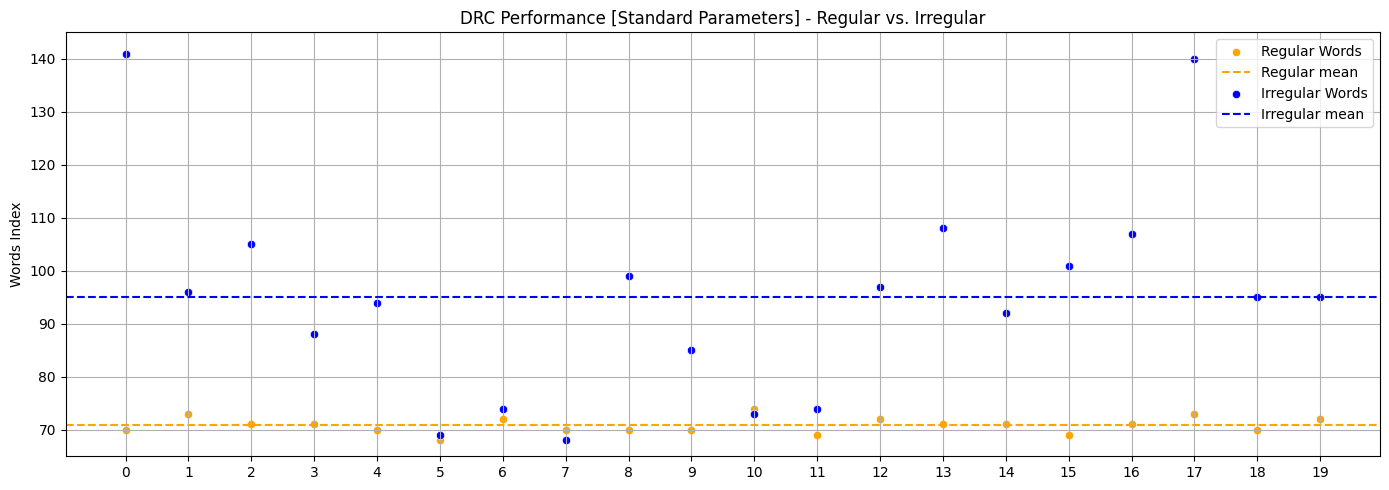

In [ ]:
# Results with standard parameters

words_regular = ["buds", "canes", "coil", "curl", "grade", "lump", "lode", "pops", "rump", "sock", "sage", "suck", "sobs", "wade", "weed", "wick", "weld", "wilt", "woke", "wink"]
cycles_regular = [70, 73, 71, 71, 70, 68, 72, 70, 70, 70, 74, 69, 72, 71, 71, 69, 71, 73, 70, 72]
mean_regular = 70.850
std_dev_regular = 1.459

words_irregular = ["bury", "caste", "comb", "grow", "glove", "lure", "lute", "pour", "ruse", "sew", "sans", "sues", "sown", "wand", "warn", "warp", "wasp", "wily", "wool", "worm"]
cycles_irregular = [141, 96, 105, 88, 94, 69, 74, 68, 99, 85, 73, 74, 97, 108, 92, 101, 107, 140, 95, 95]
mean_irregular = 95.050
std_dev_irregular = 19.418

# Graph plotting

plt.figure(figsize=(14, 5))

sns.scatterplot(x=range(len(words_regular)), y=cycles_regular, color='orange', label=f'Regular Words')
plt.axhline(y=mean_regular, color='orange', linestyle='--', label=f'Regular mean')

sns.scatterplot(x=range(len(words_irregular)), y=cycles_irregular, color='blue', label=f'Irregular Words')
plt.axhline(y=mean_irregular, color='blue', linestyle='--', label=f'Irregular mean')

plt.ylabel('Cycles')
plt.ylabel('Words Index')
plt.title('DRC Performance [Standard Parameters] - Regular vs. Irregular')
plt.xticks(range(len(words_regular)), color='black')
plt.legend()
plt.ylim(65, 145)
plt.grid(True)

plt.tight_layout()
plt.show()


Overall, the plot indicate a consistent trend of increased difficulty in reading irregular words compared to the regular ones, accompanied by higher variability. Regular words consistently demonstrate more compact performance, with a mean reading time of 70.850 and a standard deviation of 1.459. In contrast, irregular words exhibit a substantially higher mean reading time, set at 95.050, with a noticeably wider standard deviation of 19.418, indicating greater variability in reading times.

However, four irregular words are read as quickly as regular ones, while two irregular words pose particular challenges in terms of readability. This phenomenon persists across parameter variations, suggesting underlying reasons that I'll try to explain below.

#### **Simulations - Lexical Route activation dynamics**

The discrepancy in behavior stands in an incongruence between the lexical and non-lexical grapheme-phoneme conversion (GPC) routes. In irregular words, this incongruence results in the non-lexical route inhibiting the retrieval process of lexical storage. This dependency significantly influences the performance of the DRC model. Hence, a deeper examination of the dynamics within the lexical route parameters could shed light on how to amplify or diminish this effect.

Commands

Stronger lexical route
```
./drc --nofiles -P OrthlexPhonlexExcitation 0.8 -P OrthlexLetterExcitation 0.8 -b irregular.txt
./drc --nofiles -P OrthlexPhonlexExcitation 0.8 -P OrthlexLetterExcitation 0.8 -b regular.txt
```

Weaker lexical route
```
$ ./drc --nofiles -P OrthlexPhonlexExcitation 0.0001 -P OrthlexLetterExcitation 0.0001 -b irregular.txt
$ ./drc --nofiles -P OrthlexPhonlexExcitation 0.0001 -P OrthlexLetterExcitation 0.0001 -b regular.txt
```

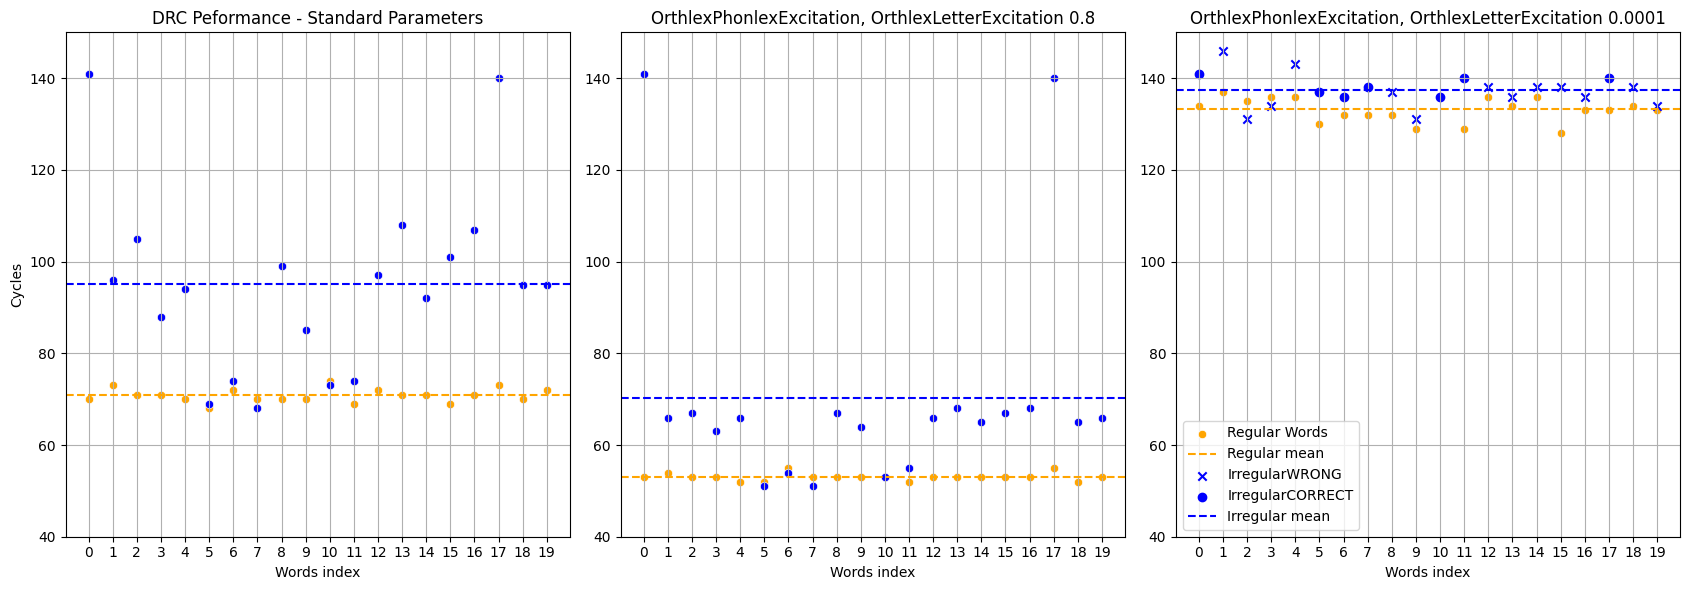

In [ ]:
plt.figure(figsize=(17, 6))

########### Standard Parameters
words_regular = ["buds", "canes", "coil", "curl", "grade", "lump", "lode", "pops", "rump", "sock", "sage", "suck", "sobs", "wade", "weed", "wick", "weld", "wilt", "woke", "wink"]
cycles_regular = [70, 73, 71, 71, 70, 68, 72, 70, 70, 70, 74, 69, 72, 71, 71, 69, 71, 73, 70, 72]
mean_regular = 70.850
std_dev_regular = 1.459

words_irregular = ["bury", "caste", "comb", "grow", "glove", "lure", "lute", "pour", "ruse", "sew", "sans", "sues", "sown", "wand", "warn", "warp", "wasp", "wily", "wool", "worm"]
cycles_irregular = [141, 96, 105, 88, 94, 69, 74, 68, 99, 85, 73, 74, 97, 108, 92, 101, 107, 140, 95, 95]
mean_irregular = 95.050
std_dev_irregular = 19.418

plt.subplot(1, 3, 1)
sns.scatterplot(x=range(len(words_regular)), y=cycles_regular, color='orange')
plt.axhline(y=mean_regular, color='orange', linestyle='--')
sns.scatterplot(x=range(len(words_irregular)), y=cycles_irregular, color='blue')
plt.axhline(y=mean_irregular, color='blue', linestyle='--')
plt.ylabel('Cycles')
plt.xlabel('Words index')
plt.title('DRC Peformance - Standard Parameters')
plt.xticks(range(len(words_regular)), color='black')
plt.ylim(40, 150)
plt.grid(True)

############ Lexical route stronger
# Results
words_irregular_L = ["bury", "caste", "comb", "grow", "glove", "lure", "lute", "pour", "ruse", "sew", "sans", "sues", "sown", "wand", "warn", "warp", "wasp", "wily", "wool", "worm"]
cycles_irregular_L = [141, 66, 67, 63, 66, 51, 54, 51, 67, 64, 53, 55, 66, 68, 65, 67, 68, 140, 65, 66]
mean_irregular_L = 70.150
std_dev_irregular_L = 24.152

words_regular_L = ["buds", "canes", "coil", "curl", "grade", "lump", "lode", "pops", "rump", "sock", "sage", "suck", "sobs", "wade", "weed", "wick", "weld", "wilt", "woke", "wink"]
cycles_regular_L = [53, 54, 53, 53, 52, 52, 55, 53, 53, 53, 53, 52, 53, 53, 53, 53, 53, 55, 52, 53]
mean_regular_L = 53.050
std_dev_regular_L = 0.805

plt.subplot(1, 3, 2)
sns.scatterplot(x=range(len(words_regular_L)), y=cycles_regular_L, color='orange')
plt.axhline(y=mean_regular_L, color='orange', linestyle='--')
sns.scatterplot(x=range(len(words_irregular_L)), y=cycles_irregular_L, color='blue')
plt.axhline(y=mean_irregular_L, color='blue', linestyle='--')
plt.title('OrthlexPhonlexExcitation, OrthlexLetterExcitation 0.8')
plt.xlabel('Words index')
plt.xticks(range(len(words_regular_L)), color='black')
plt.ylim(40, 150)
plt.grid(True)

########### Lexical route weaker
# Results
words_regular_GPC = ["buds", "canes", "coil", "curl", "grade", "lump", "lode", "pops", "rump", "sock", "sage", "suck", "sobs", "wade", "weed", "wick", "weld", "wilt", "woke", "wink"]
cycles_regular_GPC = [134, 137, 135, 136, 136, 130, 132, 132, 132, 129, 136, 129, 136, 134, 136, 128, 133, 133, 134, 133]
mean_regular_GPC = 133.250
std_dev_regular_GPC = 2.605

words_irregular_GPC = ["bury", "caste", "comb", "grow", "glove", "lure", "lute", "pour", "ruse", "sew", "sans", "sues", "sown", "wand", "warn", "warp", "wasp", "wily", "wool", "worm"]
cycles_irregular_GPC = [141, 146, 131, 134, 143, 137, 136, 138, 137, 131, 136, 140, 138, 136, 138, 138, 136, 140, 138, 134]
correctness_irregular_GPC = ['CORRECT', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'CORRECT', 'CORRECT', 'CORRECT', 'WRONG', 'WRONG', 'CORRECT', 'CORRECT', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'CORRECT', 'WRONG', 'WRONG']
mean_irregular_GPC = 137.400
std_dev_irregular_GPC = 3.513

plt.subplot(1, 3, 3)
sns.scatterplot(x=range(len(words_regular_GPC)), y=cycles_regular_GPC, color='orange', label=f'Regular Words')
plt.axhline(y=mean_regular_GPC, color='orange', linestyle='--', label=f'Regular mean')
marker_types = {'CORRECT': 'o', 'WRONG': 'x'}
for correctness in set(correctness_irregular_GPC):
    indices = [i for i, val in enumerate(correctness_irregular_GPC) if val == correctness]
    plt.scatter([words_irregular_GPC.index(words_irregular_GPC[i]) for i in indices], [cycles_irregular_GPC[i] for i in indices], color='blue', marker=marker_types[correctness], label=('Irregular' + correctness))
plt.axhline(y=mean_irregular_GPC, color='blue', linestyle='--', label=f'Irregular mean')
plt.title('OrthlexPhonlexExcitation, OrthlexLetterExcitation 0.0001')
plt.xlabel('Words index')
plt.xticks(range(len(words_regular_L)), color='black')
plt.ylim(40, 150)
plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()

The central characteristics that will influence these dynamics center around the strength of lexical activation at the phoneme level. When lexical activation is exceptionally strong, the inhibition caused by the non-lexical route becomes so weak that it cancels the regularity effect. As evidenced by the results, strengthening lexical activation leads to faster performance for irregular words, with all words named correctly, oncoming the speed of regular words, which is still faster for poor intrinsic contrasts.

Conversely, if parameters are set such that non-lexical activation at the phoneme level is predominant, irregular words tend to be regularized rather than pronounced correctly. The model heavily relies on the Grapheme-to-Phoneme Conversion (GPC) route, incurring a latency cost caused by single letters reading, for both regular and irregular words. Reliance on grapheme-phoneme correspondance rule increases the likelihood of regularization errors, leading to incorrect word outputs. This is mirroring human behavioral performance. In experimental settings, humans attempting to read irregular words quickly often make regularization errors.

Four irregular words are read as quickly as regular ones, while two irregular words challenge readability, persisting across parameter variations. Words that consistently perform slowly, even under standard parameters, include *bury* and *wily*. Conversely, irregular words that perform comparably to regular words include *lure, lute, pour, sans, sues*. The model's struggle with certain word types over others might contribute to this phenomenon. In particular, DRC mirrors human performance with words like *chef* - low-frequency and first position irregular word - slowing down the overall process due to irregularity at the first grapheme entrance.

In [ ]:
#############################################################################################################################################################

## **[2] Pseudo-homophone effect**

**Instructions**

The pseudo-homophone effect consists in the fact that nonwords that are homophonic to real words (e.g., brane, brees) are read faster than otherwise comparable control nonwords (e.g., clafe, kraaf; e.g., *McCann and Besner, 1987; Taft and Russell, 1992*). Try and see whether the DRC is able to simulate the effect (use nonwordPseudohomophone.txt andnonwordNonPseudohomophones.txt). Why does this effect arise? Illustrate with reference to the activation dynamics.

#### **DRC and pseudo-homophone effect**
- The pseudo-homophone effect consists in the fact that nonwords that are homophonic to real words (e.g., *brane, brees)* are read faster than otherwise comparable control nonwords (e.g., *clafe, kraaf;* e.g., *McCann and Besner, 1987; Taft and Russell, 1992).*

The phenomenon of pseudohomophones (PSH) being pronounced louder is attributed to the naming process, as demonstrated by various studies *(e.g., McCann & Besner, 1987; Seidenberg et al., 1996; Taft & Russell, 1992)*. This effect is influenced by orthographic similarity, with pseudohomophones pronounced more rapidly when they closely resemble their base words orthographically *(Mar- murek & Kwantes, 1996)*. This accelerated pronunciation process occurs because the activation of the base word in the phonological lexicon increases as the nonlexical route operates slowly, thereby facilitating activation at the phoneme level.

Pseudohomophone words bear resemblance to words stored in the vocabulary, making them easier to recognize and process quickly within the lexical route. Conversely, non-pseudohomophonic words are less likely to have direct matches in the stored vocabulary, thus more likely to engage the grapheme-to-phoneme conversion (GPC) route. The GPC route typically demands more time for processing as it involves decoding the word letter by letter and applying phonetic rules, which can be more time-consuming compared to the direct recognition facilitated by the lexical route. Consequently, this extended time allows for the activation to propagate forward, facilitating activation at the phoneme level.








#### **Simulations - Standard Parameters**
Commands
```
$ ./drc -b nonwordPseudohomophone.txt
$ ./drc -b nonwordNonPseudohomophone.txt
```

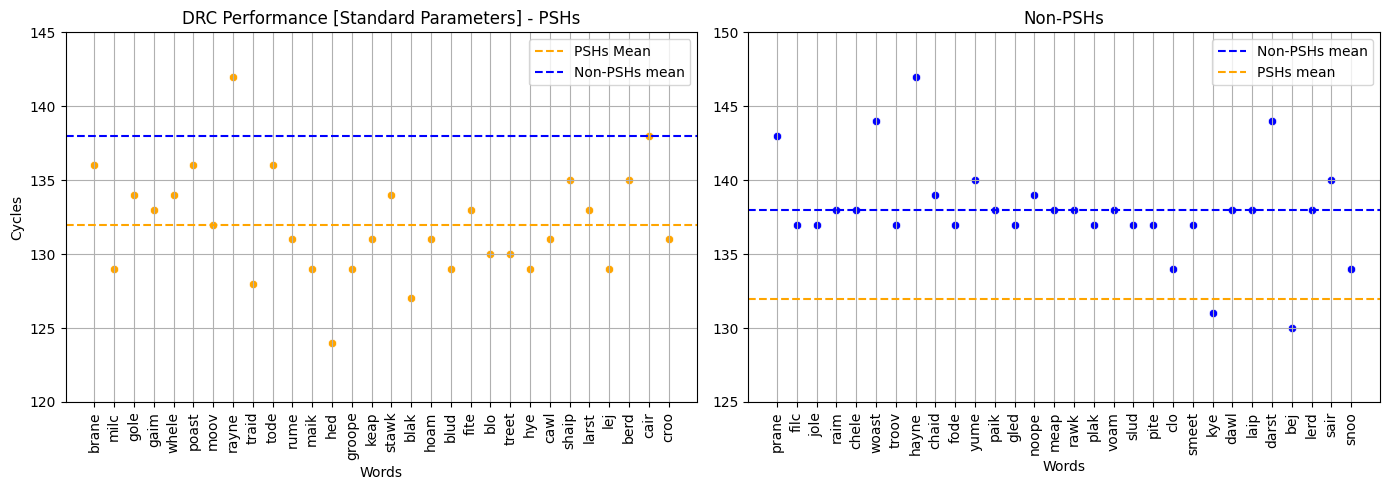

In [ ]:
# nonwordPseudohomophone
words_PSH = [
    "brane", "milc", "gole", "gaim", "whele", "poast", "moov", "rayne",
    "traid", "tode", "rume", "maik", "hed", "groope", "keap", "stawk",
    "blak", "hoam", "blud", "fite", "blo", "treet", "hye", "cawl",
    "shaip", "larst", "lej", "berd", "cair", "croo"
]
cycles_PSH = [136, 129, 134, 133, 134, 136, 132, 142, 128, 136, 131, 129, 124, 129,
            131, 134, 127, 131, 129, 133, 130, 130, 129, 131, 135, 133, 129, 135,
            138, 131]
mean_correct_PSH = 131.967
std_dev_PSH = 3.601

# nonwordNonPseudohomophone
words_nonPSH = [
    "prane", "filc", "jole", "raim", "chele", "woast", "troov", "hayne",
    "chaid", "fode", "yume", "paik", "gled", "noope", "meap", "rawk",
    "plak", "voam", "slud", "pite", "clo", "smeet", "kye", "dawl",
    "laip", "darst", "bej", "lerd", "sair", "snoo"
]
cycles_nonPSH = [143, 137, 137, 138, 138, 144, 137, 147, 139, 137, 140, 138, 137, 139,
          138, 138, 137, 138, 137, 137, 134, 137, 131, 138, 138, 144, 130, 138,
          140, 134]
mean_correct_nonPSH = 138.000
std_dev_nonPSH = 3.376


# Graph
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=range(len(words_PSH)), y=cycles_PSH, color='orange')
plt.axhline(y=mean_correct_PSH, color='orange', linestyle='--', label=f'PSHs Mean')
plt.axhline(y=mean_correct_nonPSH, color='blue', linestyle='--', label=f'Non-PSHs mean')
plt.ylabel('Cycles')
plt.xlabel('Words')
plt.title('DRC Performance [Standard Parameters] - PSHs')
plt.xticks(range(len(words_PSH)), words_PSH, rotation=90, color='black')
plt.legend()
plt.ylim(120, 145)
plt.grid(True)

plt.subplot(1, 2, 2)
sns.scatterplot(x=range(len(words_nonPSH)), y=cycles_nonPSH, color='blue')
plt.axhline(y=mean_correct_nonPSH, color='blue', linestyle='--', label=f'Non-PSHs mean')
plt.axhline(y=mean_correct_PSH, color='orange', linestyle='--', label=f'PSHs mean')
plt.title('Non-PSHs')
plt.xlabel('Words')
plt.xticks(range(len(words_nonPSH)), words_nonPSH, rotation=90, color='black')
plt.legend()
plt.ylim(125, 150)
plt.grid(True)

plt.tight_layout()
plt.show()


Evidence suggests that pseudo-homophone words generally offer smoother reading performance, leveraging on the advantages of the lexical route. The mean reading time for PSHs is 131.967 with a standard deviation of 3.601, whereas for non-PSHs, the mean reading time is 138, with a standard deviation of 3.376. This data generally confirms that PSHs are processed and read faster by the DRC model.

However, there are exceptions, with a couple of PSH words (*rayne, cair*), being slower to read than non-PSHs. And two words between the nonPSHs which are faster in processing than the mean speed performance of PSHs (*hye, bej*).

#### **Simulations - Weaker Phonological Lexicon Route**

The observed phenomenon can be attributed to phonological lexical retrieval, particularly concerning the mapping to the phonological lexicon. When the lexical route is attenuated, simulations reveal almost identical processing speeds between PSH and non-PSH words, highlighting the reliance of the pseudo-homophone effect on the retrieval process within the phonological lexical route. Below are the results of simulations while making the Phonological Lexicon route weaker.

Commands
```
$ ./drc --nofiles -P PhonlexPhonemeExcitation 0.0001 -P PhonlexOrthlexExcitation 0.0001 -b nonwordPseudohomophone.txt
$ ./drc --nofiles -P PhonlexPhonemeExcitation 0.0001 -P PhonlexOrthlexExcitation 0.0001 -b nonwordNonPseudohomophone.txt
```

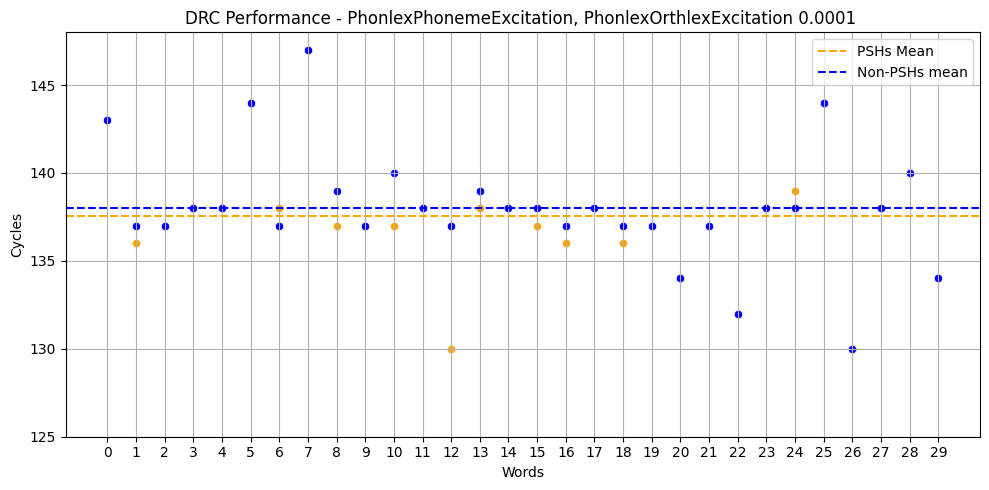

In [ ]:
# PSH
words_PSH = ["brane", "milc", "gole", "gaim", "whele", "poast", "moov", "rayne", "traid", "tode", "rume", "maik", "hed", "groope", "keap", "stawk", "blak", "hoam", "blud", "fite", "blo", "treet", "hye", "cawl", "shaip", "larst", "lej", "berd", "cair", "croo"]
cycles_PSH = [143, 136, 137, 138, 138, 144, 138, 147, 137, 137, 137, 138, 130, 138, 138, 137, 136, 138, 136, 137, 134, 137, 132, 138, 139, 144, 130, 138, 140, 134]
mean_PSH = 137.533
std_dev_PSH = 3.612

# Non-PSH
words_nonPSH = ["prane", "filc", "jole", "raim", "chele", "woast", "troov", "hayne", "chaid", "fode", "yume", "paik", "gled", "noope", "meap", "rawk", "plak", "voam", "slud", "pite", "clo", "smeet", "kye", "dawl", "laip", "darst", "bej", "lerd", "sair", "snoo"]
cycles_nonPSH = [143, 137, 137, 138, 138, 144, 137, 147, 139, 137, 140, 138, 137, 139, 138, 138, 137, 138, 137, 137, 134, 137, 132, 138, 138, 144, 130, 138, 140, 134]
mean_nonPSH = 138.033
std_dev_PSH = 3.311

# Graph
plt.figure(figsize=(10, 5))

sns.scatterplot(x=range(len(words_PSH)), y=cycles_PSH, color='orange')
sns.scatterplot(x=range(len(words_nonPSH)), y=cycles_nonPSH, color='blue')

plt.axhline(y=mean_PSH, color='orange', linestyle='--', label=f'PSHs Mean')
plt.axhline(y=mean_nonPSH, color='blue', linestyle='--', label=f'Non-PSHs mean')
plt.title('DRC Performance - PhonlexPhonemeExcitation, PhonlexOrthlexExcitation 0.0001 ')
plt.ylabel('Cycles')
plt.xlabel('Words')
plt.xticks(range(len(words_PSH)), color='black')
plt.legend()
plt.ylim(125, 148)
plt.grid(True)

plt.tight_layout()
plt.show()



If some points do not show up that's because their cycles number corresponds and one overlaps the other in the graph.

In [ ]:
#############################################################################################################################################################

## **[3] Surface Dyslexia**

**Instructions**

A brain injured patient is diagnosed with Surface Dyslexia when s/he’s better at reading regular words (regular.txt) and nonwords (nonwordsNonPseudohomophones.txt), as compared to irregular words (irregular.txt; e.g., *Patterson, Marshall and Coltheart, 1985*). How would you simulate such a patient with the DRC? Is there only one way to do so? If not, describe two different damages to the system that would generate the impairment, and illustrate their (different) behaviour.

#### **DRC and Surface Dyslexia**

*(Colheart et al., 2021)* have reported that the DRC model is capable of simulating two types of dyslexia: surface dyslexia and phonological dyslexia.

Surface dyslexia, as described by *(Patterson et al., 1985)*, manifests as a selective difficulty in reading irregular words aloud following brain damage, often resulting in regularization errors. Interestingly, nonword reading remains relatively preserved or even normal in some patients *(e.g., KT, see McCarthy & Warrington, 1986; or MP, see Behrmann & Bub, 1992)*.

This condition impairs the ability to perceive words as holistic units, and consequently inhibits the functionality of the lexical route, which operates at a word level for lookup-table mapping. As a result, patients primarily need to rely on the grapheme-to-phoneme conversion (GPC) route, which operates at the letter level and applies phonetic rules. This route is effective for regular words that follow such rules or nonwords where an actual pronunciation doesn't exist and GPC rules can be applied. But it is not effective for irregular words, which rely more on the lexical route that is now impaired.

#### **Simulations - Standard parameters (Normal conditions patient)**
Commands:
```
$ ./drc -b regular.txt
$ ./drc -b nonwordNonPseudohomophone.txt
$ ./drc -b irregular.txt
```




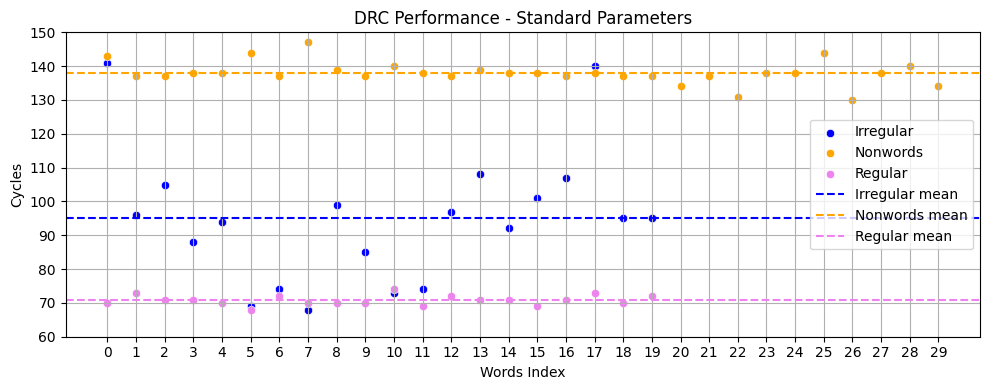

In [ ]:
# Data from irregular.txt
words_irregular_normal = ["bury", "caste", "comb", "grow", "glove", "lure", "lute", "pour", "ruse", "sew", "sans", "sues", "sown", "wand", "warn", "warp", "wasp", "wily", "wool", "worm"]
cycles_irregular_normal = [141, 96, 105, 88, 94, 69, 74, 68, 99, 85, 73, 74, 97, 108, 92, 101, 107, 140, 95, 95]
mean_irregular_normal = 95.050
std_dev_irregular_normal = 19.418

# Data from nonwordNonPseudohomophone.txt
words_nonPSH_normal = ["prane", "filc", "jole", "raim", "chele", "woast", "troov", "hayne", "chaid", "fode", "yume", "paik", "gled", "noope", "meap", "rawk", "plak", "voam", "slud", "pite", "clo", "smeet", "kye", "dawl", "laip", "darst", "bej", "lerd", "sair", "snoo"]
cycles_nonPSH_normal = [143, 137, 137, 138, 138, 144, 137, 147, 139, 137, 140, 138, 137, 139, 138, 138, 137, 138, 137, 137, 134, 137, 131, 138, 138, 144, 130, 138, 140, 134]
mean_nonPSH_normal = 138.000
std_dev_nonPSH_normal = 3.376

# Data from regular.txt
words_regular_normal = ["buds", "canes", "coil", "curl", "grade", "lump", "lode", "pops", "rump", "sock", "sage", "suck", "sobs", "wade", "weed", "wick", "weld", "wilt", "woke", "wink"]
cycles_regular_normal = [70, 73, 71, 71, 70, 68, 72, 70, 70, 70, 74, 69, 72, 71, 71, 69, 71, 73, 70, 72]
mean_regular_normal = 70.850
std_dev_regular_normal = 1.459

plt.figure(figsize=(10, 4))

sns.scatterplot(x=range(len(words_irregular_normal)), y=cycles_irregular_normal, color='blue', label=f'Irregular')
sns.scatterplot(x=range(len(words_nonPSH_normal)), y=cycles_nonPSH_normal, color='orange', label=f'Nonwords')
sns.scatterplot(x=range(len(words_regular_normal)), y=cycles_regular_normal, color='violet', label=f'Regular')

plt.axhline(y=mean_irregular_normal, color='blue', linestyle='--', label=f'Irregular mean')
plt.axhline(y=mean_nonPSH_normal, color='orange', linestyle='--', label=f'Nonwords mean')
plt.axhline(y=mean_regular_normal, color='violet', linestyle='--', label=f'Regular mean')

plt.title('DRC Performance - Standard Parameters')
plt.ylabel('Cycles')
plt.xlabel('Words Index')

plt.xticks(range(len(words_nonPSH_normal)), color='black')
plt.legend()
plt.ylim(60, 150)

plt.tight_layout()
plt.grid(True)
plt.show()


The distribution of reading speeds highlights the efficiency of processing regular words, characterized by a narrow distribution (standard deviation = 1.459) and an average of approximately 71 cycles. Irregular words, while still processed relatively quickly under normal conditions, with a mean of around 95 cycles, exhibit a broader distribution, standard deviation at 20. In fact, certain irregular words (*bury, wily*) demonstrate slower reading speeds than nonwords, highlighting the variability within this category. Additionally, five words (*lure, lute, pour, sans, sues*) approach the average speed of regular words, further illustrating the variability of irregular word processing.

In contrast, nonwords are consistently read much slower, with a mean of 138 cycles and a narrow distribution of approximately 3.4. This contrast in processing speeds among regular words, irregular words, and nonwords highlights the challenges posed by nonwords in particular and irregular words under normal cognitive conditions.

#### **Simulations - Surface Dyslexia   [A]**

In the first simulation case, it's been shown how **inhibiting the lexical route** can result in extreme surface dyslexia effects. The condition can be achieved by reducing a relevant parameter of the lexical route to zero, such as the **orthographical lexicon** route.

As a consequence, the model retains nonword and regular word reading, but produces regularization errors when encountering irregular words.

The lexical route, still effective for regular words and nonwords where pronunciation can be derived through rule application, becomes ineffective for irregular words. These irregular words heavily rely on the (human impaired) lexical route for accurate processing, which, turned down, results in showing effects of extreme surface dyslexia.

Commands:

```
$ ./drc --nofiles -P OrthlexPhonlexExcitation 0.0001 -P OrthlexLetterExcitation 0.0001 -b irregular.txt
$ ./drc --nofiles -P OrthlexPhonlexExcitation 0.0001 -P OrthlexLetterExcitation 0.0001 -b regular.txt
$ ./drc --nofiles -P OrthlexPhonlexExcitation 0.0001 -P OrthlexLetterExcitation 0.0001 -b nonwordNonPseudohomophone.txt
```

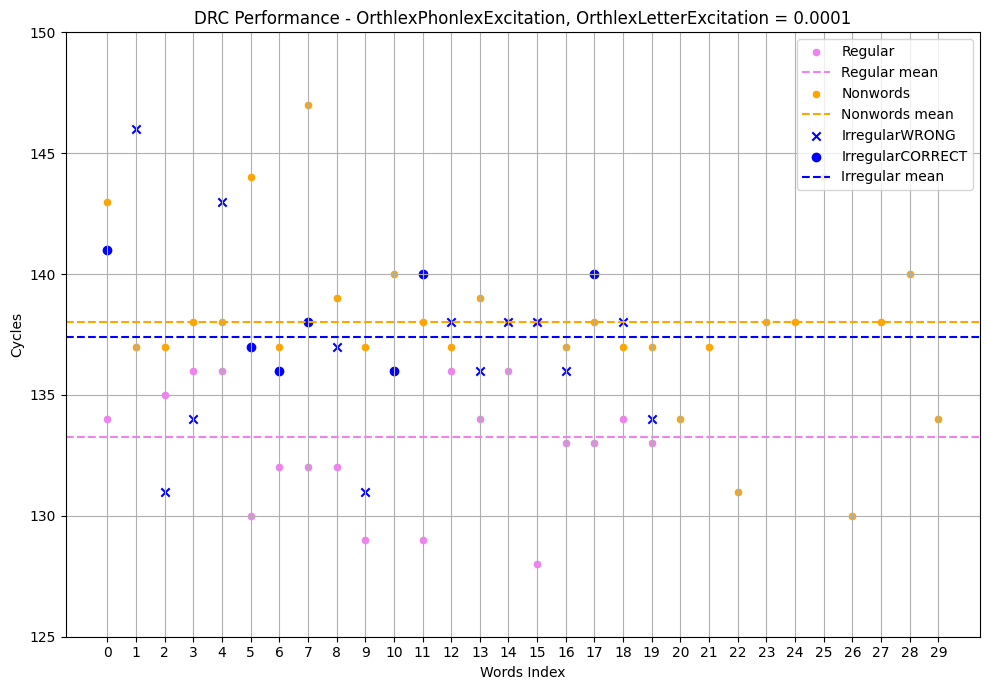

In [ ]:
# Data for regular.txt
words_regular_1st = ["buds", "canes", "coil", "curl", "grade", "lump", "lode", "pops", "rump", "sock", "sage", "suck", "sobs", "wade", "weed", "wick", "weld", "wilt", "woke", "wink"]
cycles_regular_1st = [134, 137, 135, 136, 136, 130, 132, 132, 132, 129, 136, 129, 136, 134, 136, 128, 133, 133, 134, 133]
mean_regular_1st = 133.250
std_dev_regular_1st = 2.605

# Data for nonwordNonPseudohomophone.txt
words_nonPSH_1st = ["prane", "filc", "jole", "raim", "chele", "woast", "troov", "hayne", "chaid", "fode", "yume", "paik", "gled", "noope", "meap", "rawk", "plak", "voam", "slud", "pite", "clo", "smeet", "kye", "dawl", "laip", "darst", "bej", "lerd", "sair", "snoo"]
cycles_nonPSH_1st = [143, 137, 137, 138, 138, 144, 137, 147, 139, 137, 140, 138, 137, 139, 138, 138, 137, 138, 137, 137, 134, 137, 131, 138, 138, 144, 130, 138, 140, 134]
mean_nonPSH_1st = 138.000
std_dev_nonPSH_1st = 3.376

# Data for irregular.txt
words_irregular_1st = ["bury", "caste", "comb", "grow", "glove", "lure", "lute", "pour", "ruse", "sew", "sans", "sues", "sown", "wand", "warn", "warp", "wasp", "wily", "wool", "worm"]
cycles_irregular_1st = [141, 146, 131, 134, 143, 137, 136, 138, 137, 131, 136, 140, 138, 136, 138, 138, 136, 140, 138, 134]
correctness_irregular_1st = ['CORRECT', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'CORRECT', 'CORRECT', 'CORRECT', 'WRONG', 'WRONG', 'CORRECT', 'CORRECT', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'CORRECT', 'WRONG', 'WRONG']
mean_irregular_1st = 137.400
std_dev_irregular_1st = 3.513

plt.figure(figsize=(10, 7))

# Regular (Violet)
sns.scatterplot(x=range(len(words_regular_1st)), y=cycles_regular_1st, color='violet', label=f'Regular')
plt.axhline(y=mean_regular_1st, color='violet', linestyle='--', label=f'Regular mean')
# Nonwords (Orange)
sns.scatterplot(x=range(len(words_nonPSH_1st)), y=cycles_nonPSH_1st, color='orange', label=f'Nonwords')
plt.axhline(y=mean_nonPSH_1st, color='orange', linestyle='--', label=f'Nonwords mean')

# Irregular (Blue)
marker_types = {'CORRECT': 'o', 'WRONG': 'x'}
for correctness in set(correctness_irregular_1st):
    indices = [i for i, val in enumerate(correctness_irregular_1st) if val == correctness]
    plt.scatter([words_irregular_1st.index(words_irregular_1st[i]) for i in indices], [cycles_irregular_1st[i] for i in indices], color='blue', marker=marker_types[correctness], label=('Irregular' + correctness))
plt.axhline(y=mean_irregular_1st, color='blue', linestyle='--', label=f'Irregular mean')

plt.title('DRC Performance - OrthlexPhonlexExcitation, OrthlexLetterExcitation = 0.0001')
plt.ylabel('Cycles')
plt.xlabel('Words Index')
plt.ylim(125, 150)

plt.xticks(range(len(words_nonPSH_1st)), color='black')
plt.legend(loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()


The results of this simulation illustrate a slower reading pace across all three categories. The reading cycles now fall within a more constrained range, approximately between 125 and 150 cycles, compared to the 60 to 150 cycles observed in the standard parameters simulation.

Under standard parameters, the mean reading cycles for the three groups differed consistently (around 71 for regular words, 138 for nonwords, and 95 for irregular words). In the current results, the means are around 133 for regular words, 138 for nonwords, and 137 for irregular words. This overall slowing in performance, along with the minimized disparity between sets, can be attributed to the model's sole reliance on the GPC route. Since this route reads the words letter by letter rather than holistically, it slows down the performance and makes it more similar across categories.

The performance of nonwords and irregular words in terms of speed is quite close. The notable difference lies in the model's tendency to incorrectly name irregular words, with 13 out of 20 irregular words being mispronounced due to regularization over the GPC routes, which are optimized for regular words. This highlights that conversion rules alone are insufficient to produce the correct pronunciation in the absence of input from the lexical route.
For reference, I'll include the outputs of the regularization errors for the irregular words set:

```
caste k{st 145 NAMED WRONG
comb kQm 131 NAMED WRONG
grow gr6 133 NAMED WRONG
glove gl5v 143 NAMED WRONG
ruse rus 137 NAMED WRONG
sew sW 131 NAMED WRONG
sown s6n 138 NAMED WRONG
wand w{nd 136 NAMED WRONG
warn w#n 138 NAMED WRONG
warp w#p 138 NAMED WRONG
wasp w{sp 136 NAMED WRONG
wool wul 138 NAMED WRONG
worm w9m 133 NAMED WRONG
```


In this framework, it's worth noting that the mean reading speed for nonwords remains exactly the same under both standard parameters and in this new condition. This consistency mirrors the performance of individuals with surface dyslexia, who typically exhibit normal reading abilities with nonwords and show no impairment in this aspect.

#### **Simulations - Surface Dyslexia [B]**

In the second simulation case, it's been shown how increasing the value of the **Frequency Scale** parameter, further diminishing the responsiveness of the orthographic lexicon to input, can result in extreme surface dyslexia effects.

In the DRC model, each word in the orthographic lexicon is assigned a frequency constant, ranging from zero (for the most common words) to -1 (for the least common words). During the updating process of the activation level of a unit in the orthographic lexicon, this frequency constant is factored in. The model's sensitivity to frequency is adjustable through the Frequency Scale parameter, which multiplies the frequency constant at each update. A higher Frequency Scale parameter diminishes the amount of activation added to the unit's activation level during updating, making the unit less responsive to input.

Therefore, increasing the value of the Frequency Scale parameter from 0.05 (in the standard parameter set) to 0.7, causes a decrease in the responsiveness of units in the orthographic lexicon.

Commands:

```
$ ./drc --nofiles -P FrequencyScale  0.7 -b irregular.txt
$ ./drc --nofiles -P FrequencyScale  0.7 -b regular.txt
$ ./drc --nofiles -P FrequencyScale  0.7 -b nonwordNonPseudohomophone.txt
```

Below are the graphs for the all three simulations (standard parameters and surface dyslexia A and B parameters) for reference.

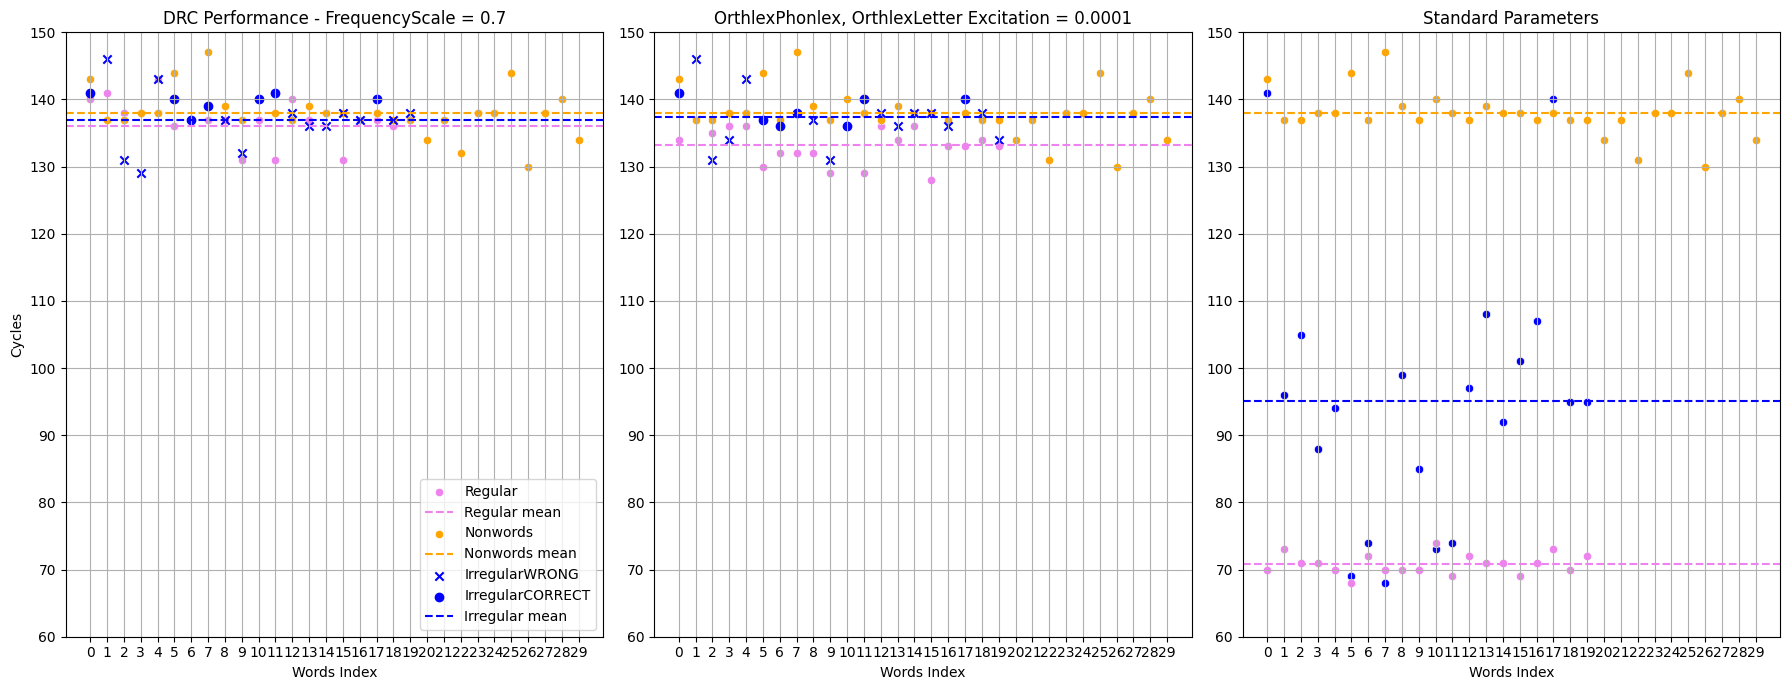

In [ ]:
plt.figure(figsize=(18, 7))
marker_types = {'CORRECT': 'o', 'WRONG': 'x'}

############ Second CASE
plt.subplot(1, 3, 1)

# Regular
words_regular_2nd = ["buds", "canes", "coil", "curl", "grade", "lump", "lode", "pops", "rump", "sock", "sage", "suck", "sobs", "wade", "weed", "wick", "weld", "wilt", "woke", "wink"]
cycles_regular_2nd = [140, 141, 138, 138, 143, 136, 137, 137, 137, 131, 137, 131, 140, 137, 138, 131, 137, 137, 136, 137]
mean_regular_2nd = 136
std_dev_regular_2nd = 3.024
# Regular (Violet)
sns.scatterplot(x=range(len(words_regular_2nd)), y=cycles_regular_2nd, color='violet', label=f'Regular')
plt.axhline(y=mean_regular_2nd, color='violet', linestyle='--', label=f'Regular mean')
# Nonwords
words_nonPSH_2nd = ["prane", "filc", "jole", "raim", "chele", "woast", "troov", "hayne", "chaid", "fode", "yume", "paik", "gled", "noope", "meap", "rawk", "plak", "voam", "slud", "pite", "clo", "smeet", "kye", "dawl", "laip", "darst", "bej", "lerd", "sair", "snoo"]
cycles_nonPSH_2nd = [143, 137, 137, 138, 138, 144, 137, 147, 139, 137, 140, 138, 137, 139, 138, 138, 137, 138, 137, 137, 134, 137, 132, 138, 138, 144, 130, 138, 140, 134]
mean_nonPSH_2nd = 138
std_dev_nonPSH_2nd = 3.311
# Nonwords (Orange)
sns.scatterplot(x=range(len(words_nonPSH_2nd)), y=cycles_nonPSH_2nd, color='orange', label=f'Nonwords')
plt.axhline(y=mean_nonPSH_2nd, color='orange', linestyle='--', label=f'Nonwords mean')
# Irregular
words_irregular_2nd = ["bury", "caste", "comb", "grow", "glove", "lure", "lute", "pour", "ruse", "sew", "sans", "sues", "sown", "wand", "warn", "warp", "wasp", "wily", "wool", "worm"]
cycles_irregular_2nd = [141, 146, 131, 129, 143, 140, 137, 139, 137, 132, 140, 141, 138, 136, 136, 138, 137, 140, 137, 138]
correctness_irregular_2nd = ['CORRECT', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'CORRECT', 'CORRECT', 'CORRECT', 'WRONG', 'WRONG', 'CORRECT', 'CORRECT', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'CORRECT', 'WRONG', 'WRONG']
mean_irregular_2nd = 137
std_dev_irregular_2nd = 3.814
# Irregular (Blue)
for correctness in set(correctness_irregular_2nd):
    indices = [i for i, val in enumerate(correctness_irregular_2nd) if val == correctness]
    plt.scatter([words_irregular_2nd.index(words_irregular_2nd[i]) for i in indices], [cycles_irregular_2nd[i] for i in indices], color='blue', marker=marker_types[correctness], label=('Irregular' + correctness))
plt.axhline(y=mean_irregular_2nd, color='blue', linestyle='--', label=f'Irregular mean')
plt.title('DRC Performance - FrequencyScale = 0.7')
plt.xlabel('Words Index')
plt.ylabel('Cycles')
plt.ylim(60, 150)
plt.xticks(range(len(words_nonPSH_2nd)), color='black')
plt.grid(True)
plt.legend(loc='lower right')

##################### FIRST CASE
plt.subplot(1, 3, 2)
# Data for regular.txt
words_regular_1st = ["buds", "canes", "coil", "curl", "grade", "lump", "lode", "pops", "rump", "sock", "sage", "suck", "sobs", "wade", "weed", "wick", "weld", "wilt", "woke", "wink"]
cycles_regular_1st = [134, 137, 135, 136, 136, 130, 132, 132, 132, 129, 136, 129, 136, 134, 136, 128, 133, 133, 134, 133]
mean_regular_1st = 133.250
std_dev_regular_1st = 2.605
# Data for nonwordNonPseudohomophone.txt
words_nonPSH_1st = ["prane", "filc", "jole", "raim", "chele", "woast", "troov", "hayne", "chaid", "fode", "yume", "paik", "gled", "noope", "meap", "rawk", "plak", "voam", "slud", "pite", "clo", "smeet", "kye", "dawl", "laip", "darst", "bej", "lerd", "sair", "snoo"]
cycles_nonPSH_1st = [143, 137, 137, 138, 138, 144, 137, 147, 139, 137, 140, 138, 137, 139, 138, 138, 137, 138, 137, 137, 134, 137, 131, 138, 138, 144, 130, 138, 140, 134]
mean_nonPSH_1st = 138.000
std_dev_nonPSH_1st = 3.376
# Data for irregular.txt
words_irregular_1st = ["bury", "caste", "comb", "grow", "glove", "lure", "lute", "pour", "ruse", "sew", "sans", "sues", "sown", "wand", "warn", "warp", "wasp", "wily", "wool", "worm"]
cycles_irregular_1st = [141, 146, 131, 134, 143, 137, 136, 138, 137, 131, 136, 140, 138, 136, 138, 138, 136, 140, 138, 134]
correctness_irregular_1st = ['CORRECT', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'CORRECT', 'CORRECT', 'CORRECT', 'WRONG', 'WRONG', 'CORRECT', 'CORRECT', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'WRONG', 'CORRECT', 'WRONG', 'WRONG']
mean_irregular_1st = 137.400
std_dev_irregular_1st = 3.513
# Regular (Violet)
sns.scatterplot(x=range(len(words_regular_1st)), y=cycles_regular_1st, color='violet')
plt.axhline(y=mean_regular_1st, color='violet', linestyle='--')
# Nonwords (Orange)
sns.scatterplot(x=range(len(words_nonPSH_1st)), y=cycles_nonPSH_1st, color='orange')
plt.axhline(y=mean_nonPSH_1st, color='orange', linestyle='--')
# Irregular (Blue)
for correctness in set(correctness_irregular_1st):
    indices = [i for i, val in enumerate(correctness_irregular_1st) if val == correctness]
    plt.scatter([words_irregular_1st.index(words_irregular_1st[i]) for i in indices], [cycles_irregular_1st[i] for i in indices], color='blue', marker=marker_types[correctness], label=('Irregular' + correctness))
plt.axhline(y=mean_irregular_1st, color='blue', linestyle='--')
plt.title('OrthlexPhonlex, OrthlexLetter Excitation = 0.0001')
plt.xlabel('Words Index')
plt.ylim(60, 150)
plt.xticks(range(len(words_nonPSH_1st)), color='black')
plt.grid(True)

################# Normal CASE
plt.subplot(1, 3, 3)

# Data from regular.txt
words_regular_normal = ["buds", "canes", "coil", "curl", "grade", "lump", "lode", "pops", "rump", "sock", "sage", "suck", "sobs", "wade", "weed", "wick", "weld", "wilt", "woke", "wink"]
cycles_regular_normal = [70, 73, 71, 71, 70, 68, 72, 70, 70, 70, 74, 69, 72, 71, 71, 69, 71, 73, 70, 72]
mean_regular_normal = 70.850
std_dev_regular_normal = 1.459
# Data from nonwordNonPseudohomophone.txt
words_nonPSH_normal = ["prane", "filc", "jole", "raim", "chele", "woast", "troov", "hayne", "chaid", "fode", "yume", "paik", "gled", "noope", "meap", "rawk", "plak", "voam", "slud", "pite", "clo", "smeet", "kye", "dawl", "laip", "darst", "bej", "lerd", "sair", "snoo"]
cycles_nonPSH_normal = [143, 137, 137, 138, 138, 144, 137, 147, 139, 137, 140, 138, 137, 139, 138, 138, 137, 138, 137, 137, 134, 137, 131, 138, 138, 144, 130, 138, 140, 134]
mean_nonPSH_normal = 138.000
std_dev_nonPSH_normal = 3.376
# Data from irregular.txt
words_irregular_normal = ["bury", "caste", "comb", "grow", "glove", "lure", "lute", "pour", "ruse", "sew", "sans", "sues", "sown", "wand", "warn", "warp", "wasp", "wily", "wool", "worm"]
cycles_irregular_normal = [141, 96, 105, 88, 94, 69, 74, 68, 99, 85, 73, 74, 97, 108, 92, 101, 107, 140, 95, 95]
mean_irregular_normal = 95.050
std_dev_irregular_normal = 19.418
# Graph
sns.scatterplot(x=range(len(words_irregular_normal)), y=cycles_irregular_normal, color='blue')
sns.scatterplot(x=range(len(words_nonPSH_normal)), y=cycles_nonPSH_normal, color='orange')
sns.scatterplot(x=range(len(words_regular_normal)), y=cycles_regular_normal, color='violet')
plt.axhline(y=mean_irregular_normal, color='blue', linestyle='--')
plt.axhline(y=mean_nonPSH_normal, color='orange', linestyle='--')
plt.axhline(y=mean_regular_normal, color='violet', linestyle='--')
plt.title('Standard Parameters')
plt.xlabel('Words Index')
plt.xticks(range(len(words_nonPSH_normal)), color='black')
plt.ylim(60, 150)
plt.grid(True)

plt.tight_layout()
plt.show()


The results of this third simulation exhibit a similar pattern to the second simulation, with all three categories demonstrating a slower reading pace. The range of reading cycles remains constrained, comparable to the previous simulation, but with mean values for each category much closer to each other.

Dispersion of the results is slightly reduced, with standard deviations of around 3 for regular words, 3.3 for nonwords, and 3.8 for irregular words. The mean reading cycles for regular words are notably lower, with a new mean value of 136 compared to the previous value of 133, while the mean results for nonwords and irregular words remain unchanged at 138 and 137, respectively.

Inhibiting the responsiveness of the orthographic lexicon to input slows down the performance across all categories. However, the crucial difference between regular words and nonwords versus irregular words lies in the correctness of the performance. Irregular words exhibit an error rate of 13 out of 20, with the same set of incorrectly pronounced words observed in the previous simulation for surface dyslexia.

In [ ]:
#############################################################################################################################################################

#### **References**

Behrmann, M., & Bub, D. (1992). Surface dyslexia and dysgraphia: Dual routes, single lexicon. Cognitive Neuropsychology, 9, 209-251.

Coltheart, M., Rastle, K., Perry, C., Langdon, R., & Ziegler, J. (2001). DRC: a dual route cascaded model of visual word recognition and reading aloud. Psychological review, 108(1), 204–256.

Marmurek, H. H. C., & Kwantes, P. J. (1996). Reading words and wirds: Phonology and lexical access. Quarterly Journal of Experimental Psychology, 49A, 696-714.

McCann, R., & Besner, D. (1987). Reading pseudohomophones: Implica- tions for models of pronunciation assembly and the locus of word- frequency effects in naming. Journal of Experimental Psychology: Human Perception and Performance, 13, 14-24.

McCarthy, R., & Warrington, E. K. (1986). Phonological reading: Phenomena and paradoxes. Cortex, 22, 359-380.

Paap, K. R., Chen, L., & Noel, R. W. (1987, November). Word recognition: Is the sky falling on top-down processing? Paper presented at the annual meeting of the Psychonomic Society, Seattle, WA.
Paap, K. R., & Noel, R. W. (1991). Dual route models of print to sound: Still a good horse race. Psychological Research, 53, 13—24.
Patterson, K. E., & Morton, J. (1985). From orthography to phonology: An attempt at an old interpretation. In K. E. Patterson, J. C.
Marshall, & M. Coltheart (Eds.), Surface dyslexia: Cognitive and neuropsychological studies of phonological reading (pp. 335-360). Hove, England: Erlbaum

Patterson, K. E., Marshall, J. C., & Coltheart, M. (1985). Surface dyslexia: Cognitive and neuropsychological studies of phonological reading. Hove, England: Erlbaum.

Rastle, K., & Coltheart, M. (1999a). Lexical and nonlexical phonological priming. Journal of Experimental Psychology: Human Perception and Performance, 25,461-481.

Rastle, K., & Coltheart, M. (1999b). Serial and strategic effects in reading aloud. Journal of Experimental Psychology: Human Perception and Performance, 25,482-503.

Seidenberg, M. S., Waters, G. S., Barnes, M. A., & Tanenhaus, M. K. (1984). When does irregular spelling or pronunciation influence word recognition? Journal of Verbal Learning and Verbal Behavior, 23, 383-404.

Taft, M., & Russell, B. (1992). Pseudohomophone naming and the word frequency effect. Quarterly Journal of Experimental Psychology: Human Experimental Psychology, 45A,51-71.
Taraban, R., & McClelland, J. L. (1987). Conspiracy effects in word recognition. Journal of Memory and Language, 26, 608-631.